# Chapter 13:- Compare Machine Learning Algorithms

It is important to compare the performance of multiple different machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

##### 1. How to formulate an experiment to directly compare machine learning algorithms.
##### 2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
##### 3. How to report and visualize the results when comparing algorithm performance.
   

## 13.1 Choose The Best Machine Learning Model

When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have different performance characteristics. Using resampling
methods like cross validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.
When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from different perspectives. The same idea applies to model selection.
You should use a number of different ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In the next section you will discover exactly how you can do
that in Python with scikit-learn.

## 13.2 Compare Machine Learning Algorithms Consistently

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be
evaluated on a consistent test harness. In the example below six different classification
algorithms are compared on a single dataset:

#### 1--> Logistic Regression.
#### 2--> Linear Discriminant Analysis.
#### 3--> k-Nearest Neighbors.
#### 4--> Classification and Regression Trees.
#### 5--> Naive Bayes.
#### 6--> Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales.

LR 77.60423786739577
LDA 77.3462064251538
KNN 72.6555023923445
CART 68.48086124401915
NB 75.51777170198223
SVC 76.04237867395763


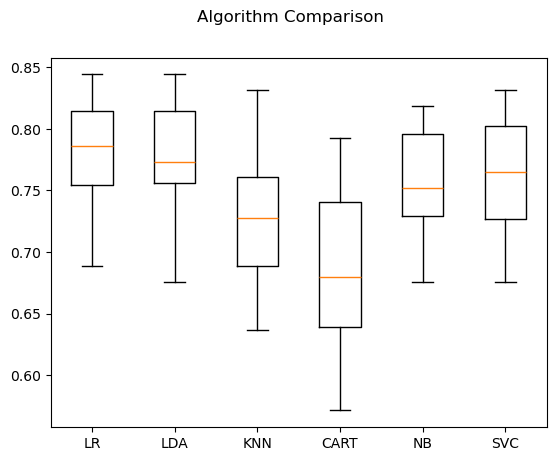

In [20]:
# Compare Algorithms for classification

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# import warnings
# warnings.filterwarnings("ignore")

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean()*100)
   
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
Linear Resression -34.70525594452481
[  -9.31766315  -12.60806897  -10.79859434  -36.6093648   -29.62109212
  -18.62598134   -9.46641896 -168.49831117  -33.79749469  -11.43947255]
Ridge Regression -34.07824620925927
[ -11.75904887  -17.87218543  -10.52504673  -60.79224355  -46.77806854
  -40.75196077  -17.30562005 -102.67754279  -22.8731834   -13.30594575]
Lasso Regression -34.46408458830232
[-11.67954689 -17.63174499 -10.72569549 -56.40188081 -41.97271597
 -35.33149663 -16.44464587 -84.3401959  -23.1988393  -13.9189753 ]
Elastic Net Regression -31.16457371424977
[ -81.98062745  -59.01574902 -305.87251765 -165.2269098   -96.91126275
 -124.54184314  -41.500168   -139.423016    -32.196784    -26.199512  ]
KNN Regression -107.28683898039215
[-16.62745098  -9.31607843 -17.09470588 -60.43490196 -15.88019608
 -45.81568627 -12.1912     -92.2856     -56

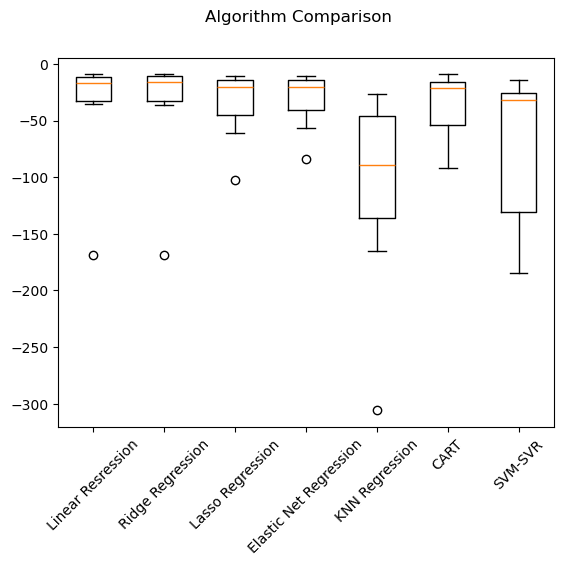

In [36]:
# Compare Algorithms for regression

from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# import warnings
# warnings.filterwarnings("ignore")

filename = 'boston.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

# prepare models
models = []
models.append(('Linear Resression', LinearRegression()))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Elastic Net Regression', ElasticNet()))
models.append(('KNN Regression', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM-SVR', SVR()))

#print(models)

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())
   
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names, rotation=45)
pyplot.show()